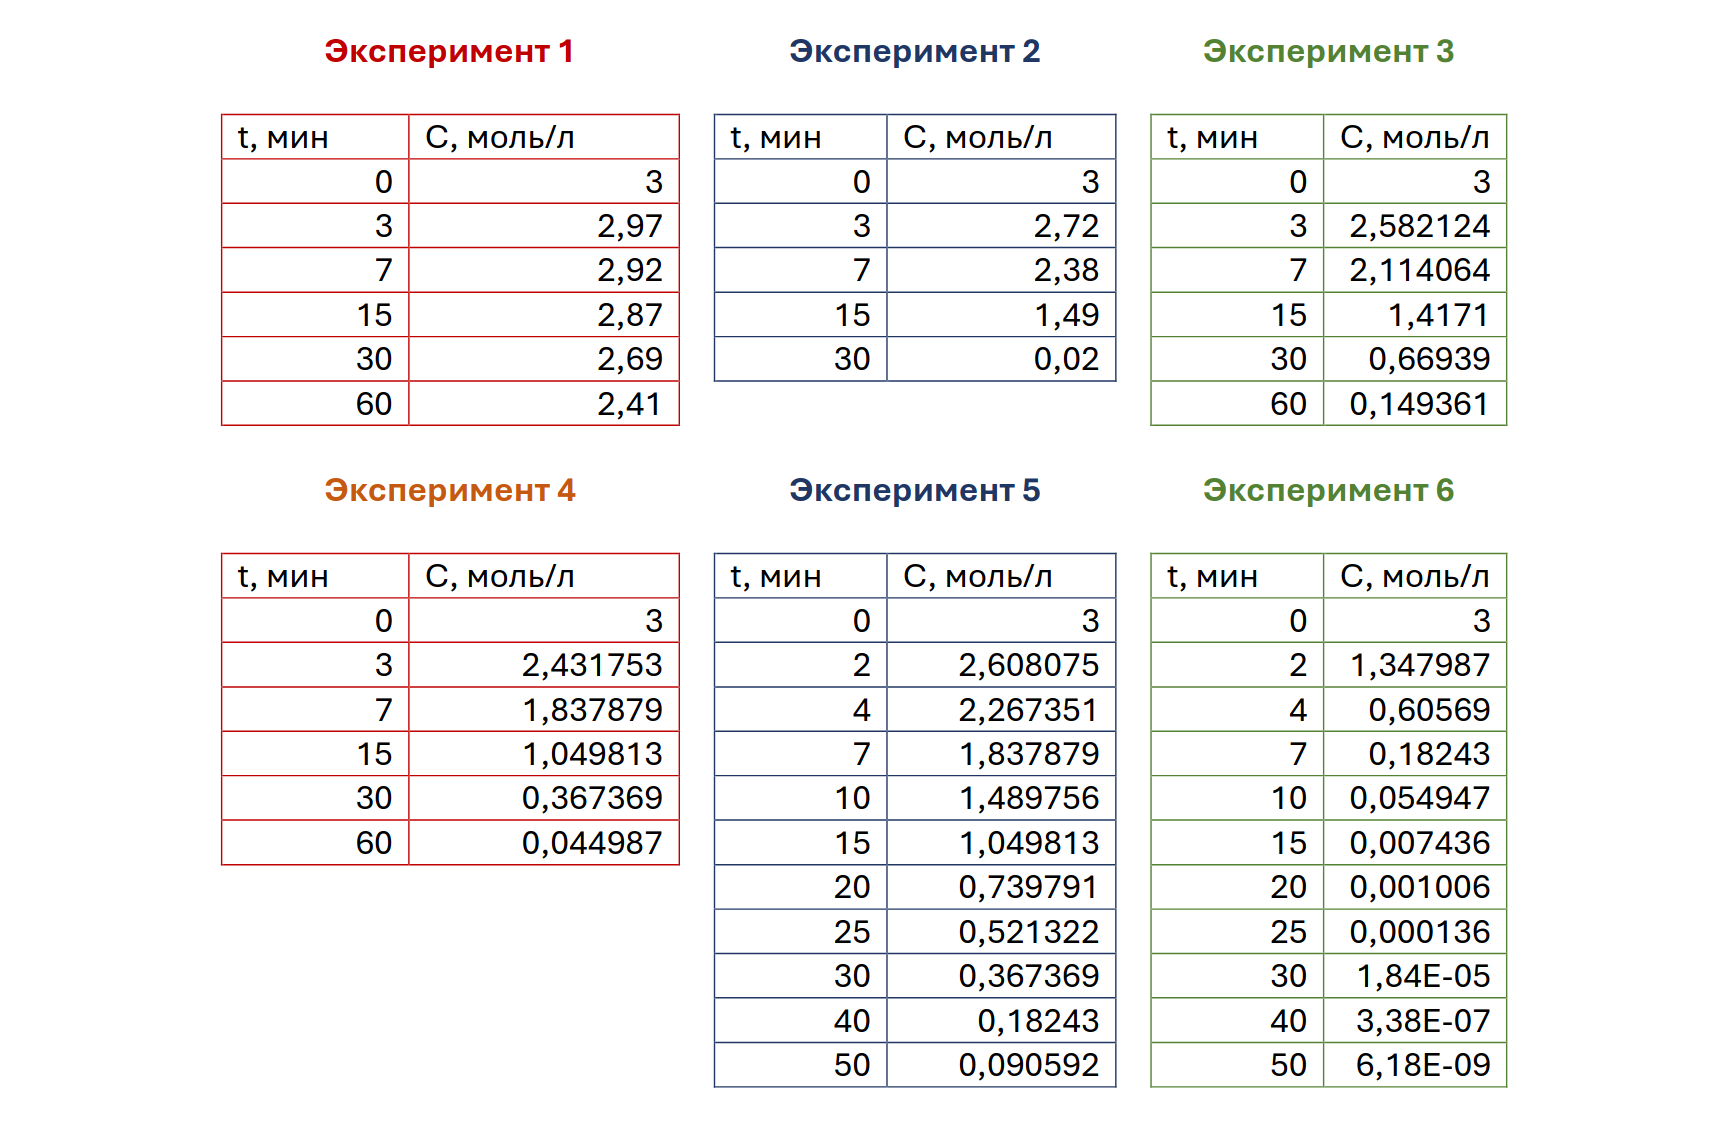

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

from IPython.display import display
from sympy import symbols, Function, dsolve, Eq, Derivative, lambdify, exp

from unc_tools import UncRegression, FunctionBase1D

In [8]:
UncRegression.latex_style(True)

In [9]:

exp1 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.97, 2.92, 2.87, 2.69, 2.41]
})

exp2 = pd.DataFrame({
    't': [0, 3, 7, 15, 30],
    'C': [3, 2.72, 2.38, 1.49, 0.02]
})

exp3 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.582124, 2.114064, 1.4171, 0.66939, 0.149361]
})

exp4 = pd.DataFrame({
    't': [0, 3, 7, 15, 30, 60],
    'C': [3, 2.431753, 1.837879, 1.049813, 0.367369, 0.044987]
})

exp5 = pd.DataFrame({
    't': [0, 2, 4, 7, 10, 15, 20, 25, 30, 40, 50],
    'C': [3, 2.608075, 2.267351, 1.837879, 1.489756, 1.049813, 0.739791, 0.521322, 0.367369, 0.18243, 0.090592]
})

exp6 = pd.DataFrame({
    't': [0, 2, 4, 7, 10, 15, 20, 25, 30, 40, 50],
    'C': [3, 1.347987, 0.60569, 0.18243, 0.054947, 0.007436, 0.001006, 0.000136, 1.84E-05, 3.38E-07, 6.18E-09]
})

exps = [exp1, exp2, exp3, exp4, exp5, exp6]


<lambdifygenerated-111>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)
<lambdifygenerated-123>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)
<lambdifygenerated-129>:2: RuntimeWarning: overflow encountered in exp
  return C1*exp(-k*x)


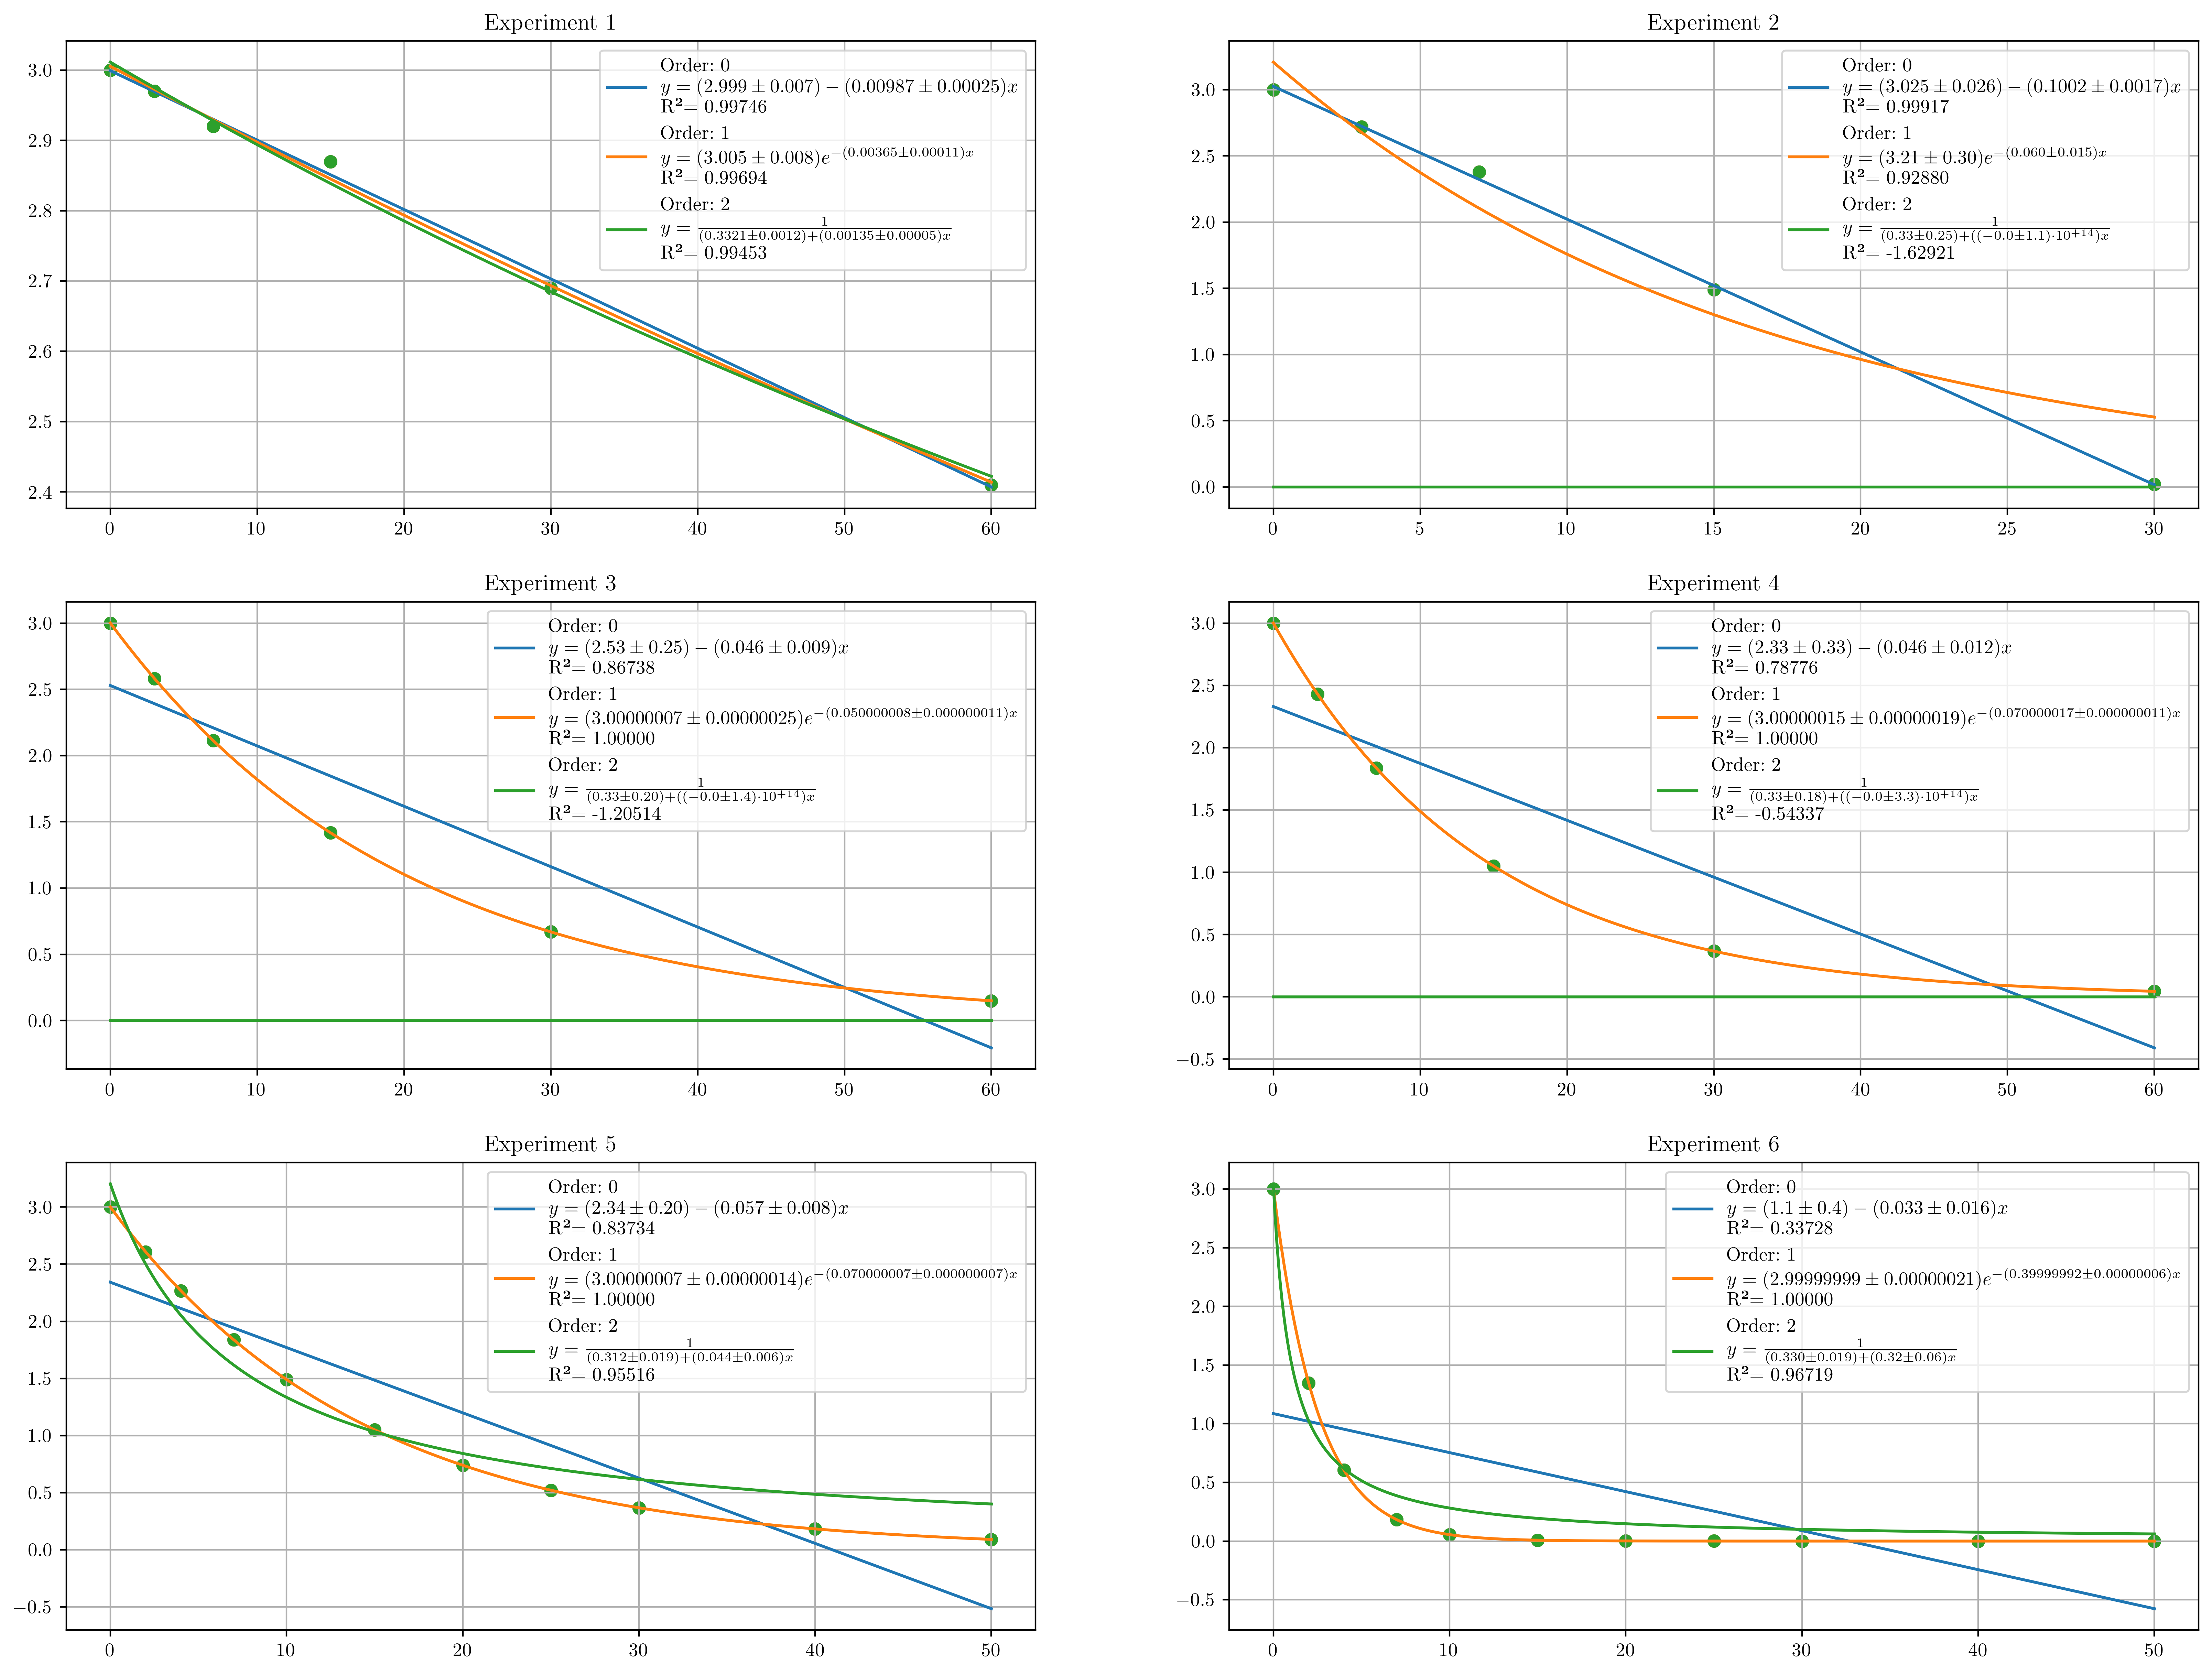

In [12]:
x, k, n = symbols("x k n")
y = Function("y")(x)

fig, axes = plt.subplots(3, 2, figsize=(20, 15), dpi=400)
axes = axes.flatten()
for idx, exp in enumerate(exps):
    ax = axes[idx]

    for i in [0, 1, 2]:
        
        eq = -Derivative(y, x, 1) - k * y**i
        sol = dsolve(eq)
        sol = sol[0].rhs if isinstance(sol, list) else sol.rhs
        
        fun = FunctionBase1D(str(sol))

        reg = UncRegression(exp.t, exp.C, func=fun)
        reg.plot(ax=ax, label=f"Order: {i}")

    ax.set_title(f"Experiment {idx + 1}")